# Neural Network
This notebook applies a simple model to simple data.  
Data = Iris.  
Model = Fully Connected aka Dense aka Multi-Layer Perceptron (MLP).   
This notebook added normalization to notebook 01. Oddly, accuracy went down.  

In [1]:
import datetime
print(datetime.datetime.now())
from platform import python_version
print('Python',python_version())
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2022-09-03 13:10:04.384782
Python 3.10.0


In [2]:
from tensorflow import keras
from keras import layers

In [3]:
from sklearn import datasets
from sklearn.utils import shuffle
iris = datasets.load_iris()
print('shape',iris.data.shape)
print('features',iris.feature_names)
print('labels',iris.target_names)
X = iris.data
y = iris.target
# At start, all species=0 come first and all species=2 come last.
# Important to shuffle rows before doing train/test split and train/valid split.
# Another way is using the sklearn train_test_split class.
X, y = shuffle(X, y, random_state=0)
print('X shape',X.shape)
print('y shape',y.shape)
num_instances = X.shape[0]
num_features =  X.shape[1]

shape (150, 4)
features ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
labels ['setosa' 'versicolor' 'virginica']
X shape (150, 4)
y shape (150,)


In [4]:
X

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [4.9, 3.6, 1.4, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2

In [5]:
y

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2,
       1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

Without normalization, the feature with biggest variance dominates.  
Unfortunately, on these data, normalization reduces the attainable accuracy.   
We use the Keras Normalization class:
1. Constructor takes axis, mean, var. By default, axis = -1 (the last axis), mean=0, var=1.
1. The adapt() method tunes the scaling parameters to the given data.
1. From then on, the object scales any given data.
1. Importantly, we adapt() to the training data and apply to the test data.

In [6]:
X_train = X[:125]
normalizer = layers.Normalization() 
normalizer.adapt(X_train)
X = normalizer(X)
X

2022-09-03 13:10:16.162287: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(150, 4), dtype=float32, numpy=
array([[-0.04254734, -0.59698707,  0.7644368 ,  1.5982144 ],
       [ 0.19382802, -1.9456023 ,  0.146869  , -0.25034815],
       [-0.39711094,  2.549782  , -1.3128369 , -1.3066696 ],
       [ 1.7302696 , -0.37221748,  1.4381473 ,  0.8059732 ],
       [-0.9880499 ,  0.75162876, -1.2566942 , -1.3066696 ],
       [ 0.54839164,  0.52685916,  1.2697196 ,  1.7302544 ],
       [-0.9880499 ,  0.9763978 , -1.3689793 , -1.1746293 ],
       [ 1.0211424 ,  0.07732059,  0.5398666 ,  0.4098527 ],
       [ 1.1393306 , -0.59698707,  0.5960094 ,  0.2778125 ],
       [ 0.3120157 , -0.59698707,  0.146869  ,  0.14577231],
       [ 0.3120157 , -1.0465256 ,  1.0451494 ,  0.2778125 ],
       [ 0.6665793 ,  0.30209017,  0.42758167,  0.4098527 ],
       [ 0.3120157 , -0.59698707,  0.5398666 ,  0.01373225],
       [ 0.784767  , -0.59698707,  0.48372412,  0.4098527 ],
       [ 0.3120157 , -0.37221748,  0.5398666 ,  0.2778125 ],
       [-1.1062376 ,  1.2011669 , -

In [7]:
X_train = X[:125]
y_train = y[:125]
X_test  = X[125:]
y_test  = y[125:]

Keras offers 2 means of building a model.  
1. The [Sequential class](https://keras.io/api/models/sequential/#sequential-class) is simple. It has an add(layer) method. It maintains layers in the order they were added. It allows linear models only. Every layer has one input and one output.
1. The [Functional API](https://keras.io/guides/functional_api/) is complex. It allows DAG models. Layers can be skipped, reused, and multiply connected.

The Dense layer has these constructor options.
1. num units
1. activation. Default=linear. Choices are relu, elu, softplus (smooth relu), softmax, sigmoid, tanh, exponential. There is an API so you can build your own.
1. use_bias. Default=True
1. kernel_initializer. Default="glorot_uniform"
1. regularizers for the bias, kernel, and activity. Default=None.

In [8]:
inputs = keras.Input(shape=(num_features,))
inputs

<KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'input_1')>

In [9]:
# Keras output layer raises exception unless #neurons == #labels in Y.
dense1 =  layers.Dense(8, activation="relu")   (inputs)
outputs = layers.Dense(3)                      (dense1)
outputs

<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'dense_1')>

In [10]:
model = keras.Model(inputs=inputs, outputs=outputs, name="MLP_1")
model.summary()

Model: "MLP_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


Explain the number of trainable parameters:
1. Dense_0: (4 input + 1 bias) * 8 out = 40 
1. Dense_1: (8 input + 1 bias) * 3 out = 27

In [11]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

Note on model.fit() and model.evaluate():
Both methods are written to be customized.
By default, [model.fit()](https://keras.io/api/models/model_training_apis/#fit-method)
has shuffle=True within each batch.  

In [12]:
EPOCHS=100
# Re-running this cell continues training same model! Must re-compile to start over.
history = model.fit(X_train, y_train, batch_size=25, epochs=EPOCHS, validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 1s 57ms/step - loss: 1.2172 - accuracy: 0.2400 - val_loss: 1.3028 - val_accuracy: 0.2000
Epoch 2/100
4/4 [==============================] - 0s 18ms/step - loss: 1.1708 - accuracy: 0.2700 - val_loss: 1.2501 - val_accuracy: 0.2000
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 1.1398 - accuracy: 0.2800 - val_loss: 1.2090 - val_accuracy: 0.2800
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 1.1128 - accuracy: 0.2900 - val_loss: 1.1706 - val_accuracy: 0.3200
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0883 - accuracy: 0.2800 - val_loss: 1.1362 - val_accuracy: 0.3200
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 1.0655 - accuracy: 0.2800 - val_loss: 1.1020 - val_accuracy: 0.3200
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 1.0443 - accuracy: 0.3100 - val_loss: 1.0704 - val_accuracy: 0.3600
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 12ms/step - loss: 0.4490 - accuracy: 0.8200 - val_loss: 0.3119 - val_accuracy: 0.8800
Epoch 60/100
4/4 [==============================] - 0s 12ms/step - loss: 0.4438 - accuracy: 0.8200 - val_loss: 0.3067 - val_accuracy: 0.8800
Epoch 61/100
4/4 [==============================] - 0s 9ms/step - loss: 0.4383 - accuracy: 0.8300 - val_loss: 0.3016 - val_accuracy: 0.8800
Epoch 62/100
4/4 [==============================] - 0s 9ms/step - loss: 0.4334 - accuracy: 0.8300 - val_loss: 0.2967 - val_accuracy: 0.8800
Epoch 63/100
4/4 [==============================] - 0s 12ms/step - loss: 0.4281 - accuracy: 0.8300 - val_loss: 0.2918 - val_accuracy: 0.8800
Epoch 64/100
4/4 [==============================] - 0s 11ms/step - loss: 0.4230 - accuracy: 0.8300 - val_loss: 0.2871 - val_accuracy: 0.8800
Epoch 65/100
4/4 [==============================] - 0s 11ms/step - loss: 0.4183 - accuracy: 0.8300 - val_loss: 0.2825 - val_accuracy: 0.8800
Epoch 66/100
4/4 [==========

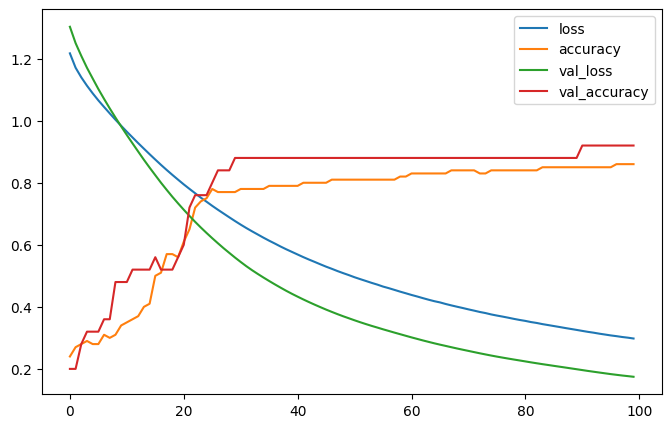

In [13]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [14]:
test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

1/1 - 0s - loss: 0.2961 - accuracy: 0.8400 - 115ms/epoch - 115ms/step
Test loss: 0.2961321175098419
Test accuracy: 0.8399999737739563
